In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import skimage.io
import os
from PIL import Image
from os import listdir
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir_train= '/content/drive/MyDrive/Green_Channel_Images'


In [ ]:
images_train=os.listdir(base_dir_train)
type(images_train)
len(images_train)

3662

In [ ]:
import os
# Get a list of all files in the directory
file_list = os.listdir(base_dir_train)

# Filter the list to include only image files (extensions: .png, .jpg, .jpeg, .gif, .bmp)
image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp']
image_files_train = [os.path.join(base_dir_train, file_name) for file_name in file_list if any(file_name.lower().endswith(ext) for ext in image_extensions)]

# Now 'image_files' is a list containing the file paths of all image files in the directory
print(image_files_train)


['/content/drive/MyDrive/Green_Channel_Images/6f0e5848d9ce.png', '/content/drive/MyDrive/Green_Channel_Images/6f3b62e5b7f5.png', '/content/drive/MyDrive/Green_Channel_Images/6f460f9968c7.png', '/content/drive/MyDrive/Green_Channel_Images/6f689fced922.png', '/content/drive/MyDrive/Green_Channel_Images/6fbaaf8eb67a.png', '/content/drive/MyDrive/Green_Channel_Images/026dcd9af143.png', '/content/drive/MyDrive/Green_Channel_Images/6fe4751a3b42.png', '/content/drive/MyDrive/Green_Channel_Images/709784f7fcc2.png', '/content/drive/MyDrive/Green_Channel_Images/7131bf4c9e6f.png', '/content/drive/MyDrive/Green_Channel_Images/7179f85bfd6f.png', '/content/drive/MyDrive/Green_Channel_Images/7116128c65ab.png', '/content/drive/MyDrive/Green_Channel_Images/70d657f8f503.png', '/content/drive/MyDrive/Green_Channel_Images/70f5caf5f305.png', '/content/drive/MyDrive/Green_Channel_Images/71e43b4f8ba6.png', '/content/drive/MyDrive/Green_Channel_Images/721214151233.png', '/content/drive/MyDrive/Green_Channel_I

In [ ]:
base_dir_train= '/content/drive/MyDrive/Green_Channel_Images'


In [ ]:
import csv
import numpy as np
from skimage import feature, io, color
import os

# Function to extract LBP features from an image
def extract_lbp_features(image):
    radius = 2
    n_points = 8 * radius
    method = 'uniform'
    lbp_image = feature.local_binary_pattern(image, n_points, radius, method)
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# List to store file paths of images
#image_files_train = [f'path_to_image_folder/{filename}' for filename in os.listdir('path_to_image_folder')]

# List to store LBP features
lbp_features_list = []

# Loop through each image, extract LBP features, and add to lbp_features_list
for image_path in image_files_train:
    # Read the image in grayscale
    image = io.imread(image_path, as_gray=True)
    # Ensure the image is in grayscale
    if len(image.shape) > 2:
        image = color.rgb2gray(image)
    # Extract LBP features from the image
    lbp_features = extract_lbp_features(image)
    # Add the features to the list
    lbp_features_list.append(lbp_features)

# Convert the list of features to a NumPy array
lbp_features_array = np.array(lbp_features_list)

# Save features to a CSV file with headers
header = [f"Feature_{i}" for i in range(lbp_features_array.shape[1])]  # Generating headers
with open('lbp2C_train_features.csv', 'w', newline='') as csvfile:
    feature_writer = csv.writer(csvfile)
    feature_writer.writerow(header)  # Write header
    feature_writer.writerows(lbp_features_array)


In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/lbp2C_train_features.csv')

# Add a serial index for rows
df.reset_index(drop=True, inplace=True)

# Save the modified DataFrame to a new CSV file
df.to_csv('/content/modified_train2C_features.csv', index=False)

# Display the updated DataFrame
print(df)


      Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0      0.057034   0.028795   0.031114   0.028719   0.022278   0.025126   
1      0.046798   0.027502   0.025253   0.025571   0.019637   0.023070   
2      0.052758   0.027230   0.029373   0.027811   0.021514   0.025808   
3      0.054347   0.027539   0.029212   0.028149   0.022045   0.026404   
4      0.033355   0.022610   0.019371   0.021875   0.015537   0.021423   
...         ...        ...        ...        ...        ...        ...   
3657   0.030056   0.016681   0.022974   0.024284   0.016200   0.024224   
3658   0.033441   0.019486   0.025065   0.025321   0.017714   0.025673   
3659   0.042997   0.024670   0.028628   0.028782   0.020178   0.025404   
3660   0.063795   0.045011   0.025770   0.022037   0.017261   0.020298   
3661   0.039147   0.022149   0.018260   0.014172   0.009946   0.009476   

      Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
0      0.028237   0.034869   0.0352

In [ ]:
import os
import pandas as pd

# Specify the path to the directory
directory_path = base_dir_train

# List all files and folders in the directory
element_names = os.listdir(directory_path)

# Extract only the names without the path and remove file extensions
element_names = [os.path.splitext(os.path.basename(element))[0] for element in element_names]

# Create a DataFrame
df = pd.DataFrame({'Element Names': element_names})

# Display the DataFrame
print(df)


     Element Names
0     6f0e5848d9ce
1     6f3b62e5b7f5
2     6f460f9968c7
3     6f689fced922
4     6fbaaf8eb67a
...            ...
3657  61ac9b0dc6b9
3658  61bbc11fe503
3659  61bbe8db6f3a
3660  61c2fbd16e38
3661  61d9c88a3a4b

[3662 rows x 1 columns]


In [ ]:
df_csv = pd.read_csv('/content/train.csv')

In [ ]:
merged_df = pd.merge(df, df_csv, left_on='Element Names', right_on='id_code', how='inner')
print(merged_df)

     Element Names       id_code  diagnosis
0     6f0e5848d9ce  6f0e5848d9ce          0
1     6f3b62e5b7f5  6f3b62e5b7f5          0
2     6f460f9968c7  6f460f9968c7          0
3     6f689fced922  6f689fced922          0
4     6fbaaf8eb67a  6fbaaf8eb67a          0
...            ...           ...        ...
3657  61ac9b0dc6b9  61ac9b0dc6b9          2
3658  61bbc11fe503  61bbc11fe503          4
3659  61bbe8db6f3a  61bbe8db6f3a          1
3660  61c2fbd16e38  61c2fbd16e38          2
3661  61d9c88a3a4b  61d9c88a3a4b          0

[3662 rows x 3 columns]


In [ ]:
merged_df = merged_df.drop('Element Names', axis =1)

In [ ]:
merged_df

,id_code,diagnosis
0,6f0e5848d9ce,0
1,6f3b62e5b7f5,0
2,6f460f9968c7,0
3,6f689fced922,0
4,6fbaaf8eb67a,0
...,...,...
3657,61ac9b0dc6b9,2
3658,61bbc11fe503,4
3659,61bbe8db6f3a,1
3660,61c2fbd16e38,2


In [ ]:
df = pd.read_csv('/content/modified_train2C_features.csv')

In [ ]:
# Concatenate the two DataFrames horizontally (along columns)
df= pd.concat([merged_df, df], axis=1)

# Display the horizontally concatenated DataFrame
df.columns

Index(['id_code', 'diagnosis', 'Feature_0', 'Feature_1', 'Feature_2',
       'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
       'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12',
       'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17'],
      dtype='object')

In [ ]:
df = df[[col for col in df.columns if col != 'diagnosis'] + ['diagnosis']]

In [ ]:
df

,id_code,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,diagnosis
0,6f0e5848d9ce,0.057034,0.028795,0.031114,0.028719,0.022278,0.025126,0.028237,0.034869,0.035226,0.047814,0.028409,0.040674,0.030678,0.035488,0.038351,0.028940,0.199548,0.258700,0
1,6f3b62e5b7f5,0.046798,0.027502,0.025253,0.025571,0.019637,0.023070,0.024724,0.035180,0.039227,0.034898,0.027496,0.029877,0.027964,0.034928,0.034075,0.024508,0.273614,0.245678,0
2,6f460f9968c7,0.052758,0.027230,0.029373,0.027811,0.021514,0.025808,0.030179,0.038811,0.038156,0.050449,0.030319,0.039191,0.029951,0.034567,0.035803,0.026791,0.217923,0.243366,0
3,6f689fced922,0.054347,0.027539,0.029212,0.028149,0.022045,0.026404,0.031060,0.039622,0.040425,0.050048,0.030233,0.038337,0.029165,0.033415,0.035268,0.026832,0.212358,0.245541,0
4,6fbaaf8eb67a,0.033355,0.022610,0.019371,0.021875,0.015537,0.021423,0.026035,0.043423,0.043664,0.043833,0.032895,0.037511,0.028093,0.036374,0.033898,0.021674,0.288524,0.229906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,61ac9b0dc6b9,0.030056,0.016681,0.022974,0.024284,0.016200,0.024224,0.029222,0.034581,0.027527,0.065850,0.030406,0.063270,0.037799,0.040591,0.035432,0.020930,0.306670,0.173303,2
3658,61bbc11fe503,0.033441,0.019486,0.025065,0.025321,0.017714,0.025673,0.030988,0.041887,0.037179,0.065662,0.036540,0.058512,0.039927,0.043587,0.037839,0.022525,0.243854,0.194798,4
3659,61bbe8db6f3a,0.042997,0.024670,0.028628,0.028782,0.020178,0.025404,0.028056,0.035118,0.030857,0.053494,0.032715,0.051631,0.038618,0.043267,0.039317,0.025169,0.223606,0.227492,1
3660,61c2fbd16e38,0.063795,0.045011,0.025770,0.022037,0.017261,0.020298,0.022151,0.027811,0.028640,0.028838,0.023895,0.023462,0.022232,0.031977,0.043353,0.046141,0.112922,0.394405,2


In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x != 0 else x)

In [ ]:
df['diagnosis']

0       0
1       0
2       0
3       0
4       0
       ..
3657    1
3658    1
3659    1
3660    1
3661    0
Name: diagnosis, Length: 3662, dtype: int64

In [ ]:
df

,id_code,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,diagnosis
0,6f0e5848d9ce,0.057034,0.028795,0.031114,0.028719,0.022278,0.025126,0.028237,0.034869,0.035226,0.047814,0.028409,0.040674,0.030678,0.035488,0.038351,0.028940,0.199548,0.258700,0
1,6f3b62e5b7f5,0.046798,0.027502,0.025253,0.025571,0.019637,0.023070,0.024724,0.035180,0.039227,0.034898,0.027496,0.029877,0.027964,0.034928,0.034075,0.024508,0.273614,0.245678,0
2,6f460f9968c7,0.052758,0.027230,0.029373,0.027811,0.021514,0.025808,0.030179,0.038811,0.038156,0.050449,0.030319,0.039191,0.029951,0.034567,0.035803,0.026791,0.217923,0.243366,0
3,6f689fced922,0.054347,0.027539,0.029212,0.028149,0.022045,0.026404,0.031060,0.039622,0.040425,0.050048,0.030233,0.038337,0.029165,0.033415,0.035268,0.026832,0.212358,0.245541,0
4,6fbaaf8eb67a,0.033355,0.022610,0.019371,0.021875,0.015537,0.021423,0.026035,0.043423,0.043664,0.043833,0.032895,0.037511,0.028093,0.036374,0.033898,0.021674,0.288524,0.229906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,61ac9b0dc6b9,0.030056,0.016681,0.022974,0.024284,0.016200,0.024224,0.029222,0.034581,0.027527,0.065850,0.030406,0.063270,0.037799,0.040591,0.035432,0.020930,0.306670,0.173303,1
3658,61bbc11fe503,0.033441,0.019486,0.025065,0.025321,0.017714,0.025673,0.030988,0.041887,0.037179,0.065662,0.036540,0.058512,0.039927,0.043587,0.037839,0.022525,0.243854,0.194798,1
3659,61bbe8db6f3a,0.042997,0.024670,0.028628,0.028782,0.020178,0.025404,0.028056,0.035118,0.030857,0.053494,0.032715,0.051631,0.038618,0.043267,0.039317,0.025169,0.223606,0.227492,1
3660,61c2fbd16e38,0.063795,0.045011,0.025770,0.022037,0.017261,0.020298,0.022151,0.027811,0.028640,0.028838,0.023895,0.023462,0.022232,0.031977,0.043353,0.046141,0.112922,0.394405,1


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = df.drop(['id_code', 'diagnosis'], axis=1)  # Features
y = df['diagnosis']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9400
Precision: 0.9400
Recall: 0.9400


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = df.drop(['id_code', 'diagnosis'], axis=1)  # Features
y = df['diagnosis']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9113
Precision: 0.9124
Recall: 0.9113


In [ ]:
from sklearn.svm import SVC

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = df.drop(['id_code', 'diagnosis'], axis=1)  # Features
y = df['diagnosis']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.6057
Precision: 0.7101
Recall: 0.6057


In [ ]:
df.columns

Index(['id_code', 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'diagnosis'],
      dtype='object')

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[[ 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[[ 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, ord =1,axis=1)
    image_names = image_database['id_code'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = df.iloc[i]
    image_database = df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9026215182960132
Average Recall: 0.00493009498074295


In [ ]:
def calculate_distances_with_names_jaccard(query_image, image_database):
    query_features = query_image[[ 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[[ 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Convert binary values based on a threshold (e.g., >0.5 as 1, else 0)
    query_features_bin = (query_features > 0.5).astype(int)
    database_features_bin = (database_features > 0.5).astype(int)

    # Compute Jaccard similarity
    intersection = np.sum(np.minimum(query_features_bin, database_features_bin), axis=1)
    union = np.sum(np.maximum(query_features_bin, database_features_bin), axis=1)

    # Avoid division by zero, replace the division by zero with NaN
    with np.errstate(divide='ignore', invalid='ignore'):  # Ignore division by zero errors
        jaccard_sim = np.divide(intersection, union, out=np.zeros_like(union, dtype=float), where=union != 0)
        distances = 1 - jaccard_sim  # Convert similarity to distance

    image_names = image_database['id_code'].values
    return distances, image_names



# Use calculate_distances_with_names_jaccard in your loop for Jaccard similarity

def retrieve_similar_images_jaccard(query_image, image_database):
    distances, image_names = calculate_distances_with_names_jaccard(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = df.iloc[i]
    image_database = df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_jaccard(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.5229382850901146
Average Recall: 0.002881431063357898


In [ ]:
def calculate_distances_with_names_cosine(query_image, image_database):
    query_features = query_image[[ 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[[ 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Calculate dot product between query and database vectors
    dot_product = np.dot(database_features, query_features)

    # Calculate magnitudes of the vectors
    query_magnitude = np.linalg.norm(query_features)
    database_magnitudes = np.linalg.norm(database_features, axis=1)

    # Calculate cosine similarity
    cosine_sim = dot_product / (query_magnitude * database_magnitudes)

    # Convert similarity to distance
    distances = 1 - cosine_sim

    image_names = image_database['id_code'].values
    return distances, image_names

# Use calculate_distances_with_names_cosine in your loop for Cosine Similarity

def retrieve_similar_images_cosine(query_image, image_database):
    distances, image_names = calculate_distances_with_names_cosine(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = df.iloc[i]
    image_database = df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_cosine(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9012288367012562
Average Recall: 0.0049223284565621155


In [ ]:
df

,id_code,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,diagnosis
0,6f0e5848d9ce,0.057034,0.028795,0.031114,0.028719,0.022278,0.025126,0.028237,0.034869,0.035226,0.047814,0.028409,0.040674,0.030678,0.035488,0.038351,0.028940,0.199548,0.258700,0
1,6f3b62e5b7f5,0.046798,0.027502,0.025253,0.025571,0.019637,0.023070,0.024724,0.035180,0.039227,0.034898,0.027496,0.029877,0.027964,0.034928,0.034075,0.024508,0.273614,0.245678,0
2,6f460f9968c7,0.052758,0.027230,0.029373,0.027811,0.021514,0.025808,0.030179,0.038811,0.038156,0.050449,0.030319,0.039191,0.029951,0.034567,0.035803,0.026791,0.217923,0.243366,0
3,6f689fced922,0.054347,0.027539,0.029212,0.028149,0.022045,0.026404,0.031060,0.039622,0.040425,0.050048,0.030233,0.038337,0.029165,0.033415,0.035268,0.026832,0.212358,0.245541,0
4,6fbaaf8eb67a,0.033355,0.022610,0.019371,0.021875,0.015537,0.021423,0.026035,0.043423,0.043664,0.043833,0.032895,0.037511,0.028093,0.036374,0.033898,0.021674,0.288524,0.229906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,61ac9b0dc6b9,0.030056,0.016681,0.022974,0.024284,0.016200,0.024224,0.029222,0.034581,0.027527,0.065850,0.030406,0.063270,0.037799,0.040591,0.035432,0.020930,0.306670,0.173303,1
3658,61bbc11fe503,0.033441,0.019486,0.025065,0.025321,0.017714,0.025673,0.030988,0.041887,0.037179,0.065662,0.036540,0.058512,0.039927,0.043587,0.037839,0.022525,0.243854,0.194798,1
3659,61bbe8db6f3a,0.042997,0.024670,0.028628,0.028782,0.020178,0.025404,0.028056,0.035118,0.030857,0.053494,0.032715,0.051631,0.038618,0.043267,0.039317,0.025169,0.223606,0.227492,1
3660,61c2fbd16e38,0.063795,0.045011,0.025770,0.022037,0.017261,0.020298,0.022151,0.027811,0.028640,0.028838,0.023895,0.023462,0.022232,0.031977,0.043353,0.046141,0.112922,0.394405,1


In [ ]:
df.columns

Index(['id_code', 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'diagnosis'],
      dtype='object')

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['id_code'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = df.iloc[i]
    image_database = df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9005188421627527
Average Recall: 0.0049184415690998245


In [ ]:
# Assuming 'df' is your DataFrame
rows_with_diagnosis_0 = df[df['diagnosis'] == 0]
rows_with_diagnosis_1 = df[df['diagnosis'] == 1]


In [ ]:
df.columns

Index(['id_code', 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'diagnosis'],
      dtype='object')

In [ ]:
df.head()

,id_code,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,diagnosis
0,6f0e5848d9ce,0.057034,0.028795,0.031114,0.028719,0.022278,0.025126,0.028237,0.034869,0.035226,0.047814,0.028409,0.040674,0.030678,0.035488,0.038351,0.028940,0.199548,0.258700,0
1,6f3b62e5b7f5,0.046798,0.027502,0.025253,0.025571,0.019637,0.023070,0.024724,0.035180,0.039227,0.034898,0.027496,0.029877,0.027964,0.034928,0.034075,0.024508,0.273614,0.245678,0
2,6f460f9968c7,0.052758,0.027230,0.029373,0.027811,0.021514,0.025808,0.030179,0.038811,0.038156,0.050449,0.030319,0.039191,0.029951,0.034567,0.035803,0.026791,0.217923,0.243366,0
3,6f689fced922,0.054347,0.027539,0.029212,0.028149,0.022045,0.026404,0.031060,0.039622,0.040425,0.050048,0.030233,0.038337,0.029165,0.033415,0.035268,0.026832,0.212358,0.245541,0
4,6fbaaf8eb67a,0.033355,0.022610,0.019371,0.021875,0.015537,0.021423,0.026035,0.043423,0.043664,0.043833,0.032895,0.037511,0.028093,0.036374,0.033898,0.021674,0.288524,0.229906,0


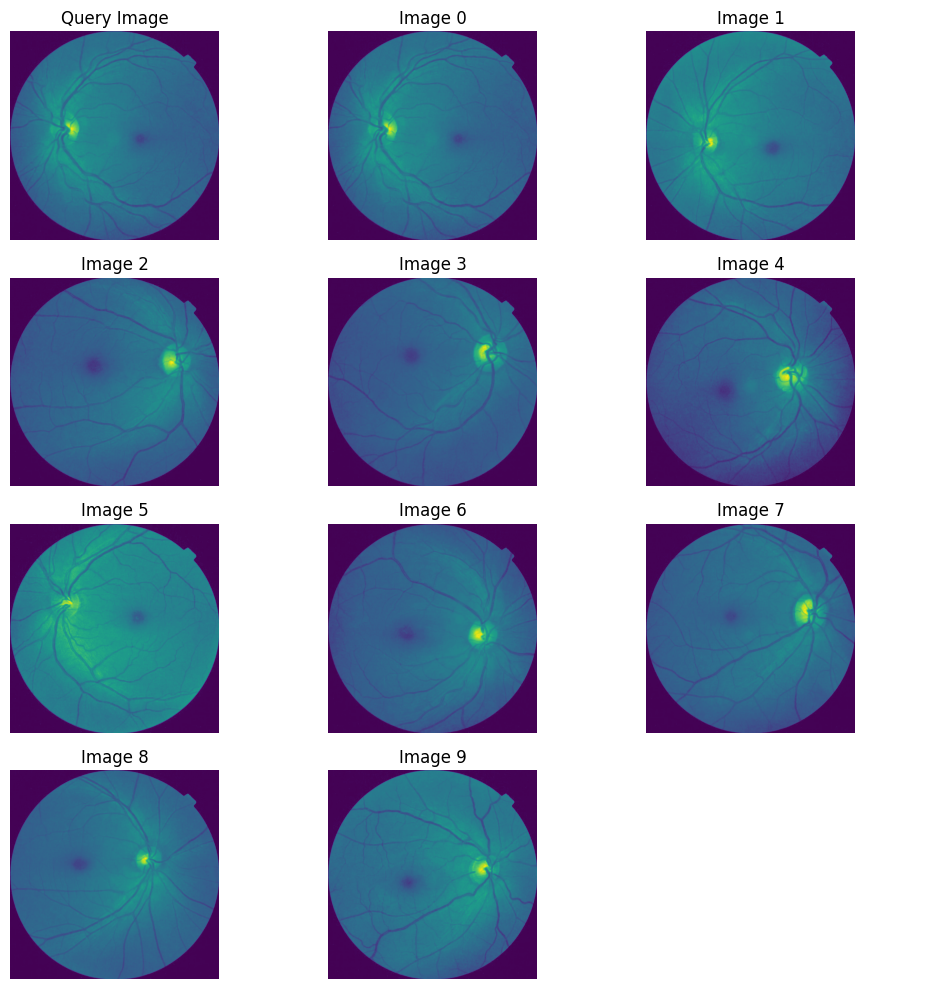

In [ ]:
import matplotlib.pyplot as plt
import math
def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)
    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['id_code'].values
    return distances, image_names
# Function to display images
def display_images_square(query_image_path, retrieved_image_paths):
    num_images = len(retrieved_image_paths) + 1
    rows = math.ceil(math.sqrt(num_images))
    cols = math.ceil(num_images / rows)

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    # Display query image in the first row
    query_img = plt.imread(query_image_path)
    axes[0, 0].imshow(query_img)
    axes[0, 0].set_title('Query Image')
    axes[0, 0].axis('off')

    # Display retrieved images in subsequent rows
    for i, image_path in enumerate(retrieved_image_paths):
        retrieved_img = plt.imread(image_path)
        row = (i + 1) // cols
        col = (i + 1) % cols
        axes[row, col].imshow(retrieved_img)
        axes[row, col].set_title(f'Image {i}')
        axes[row, col].axis('off')

    for i in range(num_images, rows * cols):
        axes[i // cols, i % cols].axis('off')

    plt.tight_layout()
    plt.show()

# Function to retrieve similar images with paths
def retrieve_similar_images_with_paths(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]  # Get top 10 similar images
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_paths = [f"/content/drive/MyDrive/Green_Channel_Images/{image_database.iloc[idx]['id_code']}.png" for idx in sorted_indices]
    return similar_images_paths

# Loop through your query images
for i in range(1):  # Loop through all query images
    query_image = df.iloc[i]  # Access your query images
    image_database = df  # Your main dataset containing images

    # Retrieve similar images with their paths
    retrieved_image_paths = retrieve_similar_images_with_paths(query_image, image_database)

    query_image_path = '/content/drive/MyDrive/Green_Channel_Images/6f0e5848d9ce.png'
    # Display retrieved images
    display_images_square(query_image_path,retrieved_image_paths)


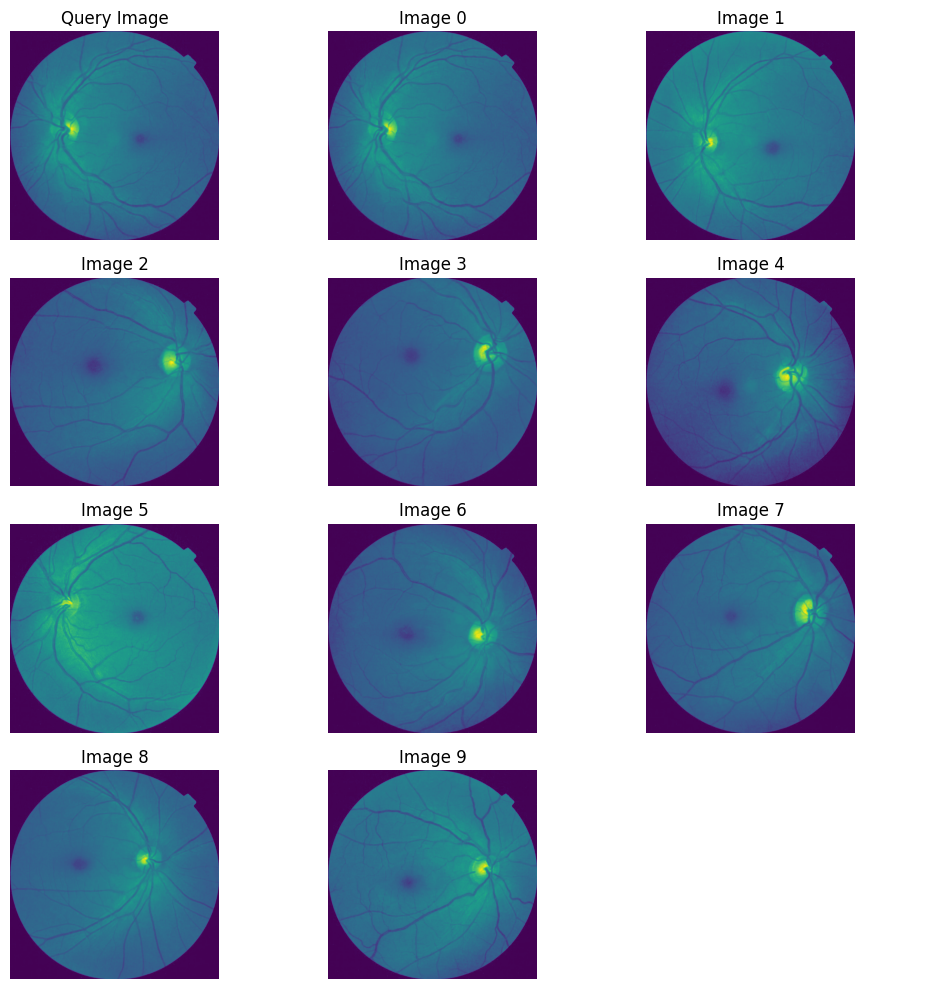

In [ ]:
import matplotlib.pyplot as plt
import math
def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)
    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['id_code'].values
    return distances, image_names
# Function to display images
def display_images_square(query_image_path, retrieved_image_paths):
    num_images = len(retrieved_image_paths) + 1
    rows = math.ceil(math.sqrt(num_images))
    cols = math.ceil(num_images / rows)

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    # Display query image in the first row
    query_img = plt.imread(query_image_path)
    axes[0, 0].imshow(query_img)
    axes[0, 0].set_title('Query Image')
    axes[0, 0].axis('off')

    # Display retrieved images in subsequent rows
    for i, image_path in enumerate(retrieved_image_paths):
        retrieved_img = plt.imread(image_path)
        row = (i + 1) // cols
        col = (i + 1) % cols
        axes[row, col].imshow(retrieved_img)
        axes[row, col].set_title(f'Image {i}')
        axes[row, col].axis('off')

    for i in range(num_images, rows * cols):
        axes[i // cols, i % cols].axis('off')

    plt.tight_layout()
    plt.show()

# Function to retrieve similar images with paths
def retrieve_similar_images_with_paths(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]  # Get top 10 similar images
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_paths = [f"/content/drive/MyDrive/Green_Channel_Images/{image_database.iloc[idx]['id_code']}.png" for idx in sorted_indices]
    return similar_images_paths

# Loop through your query images
for i in range(1):  # Loop through all query images
    query_image = rows_with_diagnosis_0.iloc[i]  # Access your query images
    image_database = df  # Your main dataset containing images

    # Retrieve similar images with their paths
    retrieved_image_paths = retrieve_similar_images_with_paths(query_image, image_database)

    query_image_path = '/content/drive/MyDrive/Green_Channel_Images/6f0e5848d9ce.png'
    # Display retrieved images
    display_images_square(query_image_path,retrieved_image_paths)


In [ ]:
rows_with_diagnosis_1.head()

,id_code,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,diagnosis
5,026dcd9af143,0.080197,0.046612,0.033050,0.021943,0.011377,0.010370,0.008682,0.008456,0.007491,0.008435,0.007994,0.010405,0.012746,0.022703,0.035716,0.037517,0.291011,0.345295,1
7,709784f7fcc2,0.019701,0.012230,0.017939,0.020190,0.016777,0.026131,0.034546,0.054651,0.054790,0.072013,0.041520,0.051862,0.033532,0.033428,0.025436,0.014180,0.343571,0.127504,1
10,7116128c65ab,0.016981,0.009968,0.016361,0.018206,0.013222,0.022800,0.030313,0.045507,0.040695,0.072654,0.037869,0.060206,0.036092,0.036383,0.027419,0.014117,0.381991,0.119218,1
11,70d657f8f503,0.047880,0.025213,0.028258,0.028170,0.023450,0.029683,0.035572,0.044451,0.040919,0.055578,0.034245,0.046607,0.033446,0.036465,0.036746,0.026412,0.195693,0.231214,1
12,70f5caf5f305,0.055017,0.027778,0.029202,0.027852,0.022185,0.025506,0.029701,0.038881,0.039724,0.047022,0.030235,0.034949,0.028096,0.031927,0.034262,0.026770,0.226297,0.244597,1


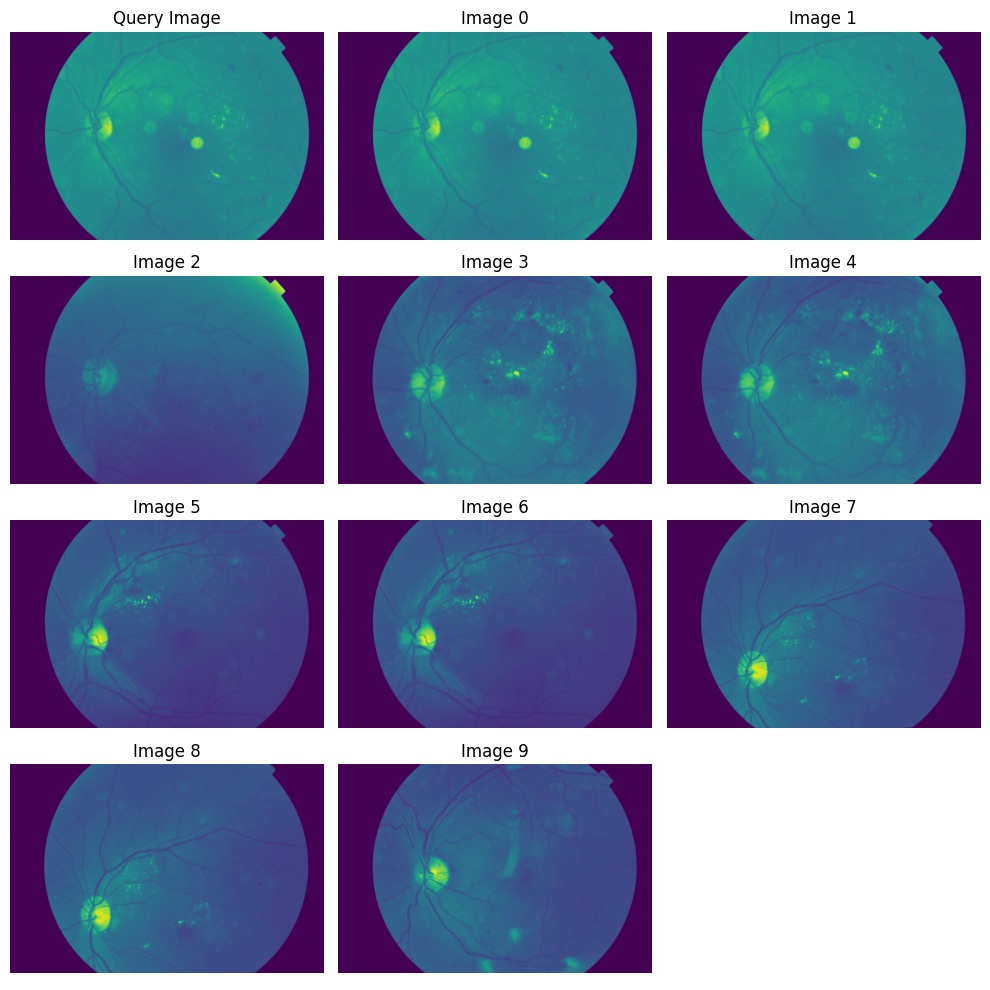

In [ ]:
import matplotlib.pyplot as plt
import math
def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)
    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['id_code'].values
    return distances, image_names
# Function to display images
def display_images_square(query_image_path, retrieved_image_paths):
    num_images = len(retrieved_image_paths) + 1
    rows = math.ceil(math.sqrt(num_images))
    cols = math.ceil(num_images / rows)

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    # Display query image in the first row
    query_img = plt.imread(query_image_path)
    axes[0, 0].imshow(query_img)
    axes[0, 0].set_title('Query Image')
    axes[0, 0].axis('off')

    # Display retrieved images in subsequent rows
    for i, image_path in enumerate(retrieved_image_paths):
        retrieved_img = plt.imread(image_path)
        row = (i + 1) // cols
        col = (i + 1) % cols
        axes[row, col].imshow(retrieved_img)
        axes[row, col].set_title(f'Image {i}')
        axes[row, col].axis('off')

    for i in range(num_images, rows * cols):
        axes[i // cols, i % cols].axis('off')

    plt.tight_layout()
    plt.show()

# Function to retrieve similar images with paths
def retrieve_similar_images_with_paths(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]  # Get top 10 similar images
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_paths = [f"/content/drive/MyDrive/Green_Channel_Images/{image_database.iloc[idx]['id_code']}.png" for idx in sorted_indices]
    return similar_images_paths

# Loop through your query images
for i in range(1):  # Loop through all query images
    query_image = rows_with_diagnosis_1.iloc[i]  # Access your query images
    image_database = df  # Your main dataset containing images

    # Retrieve similar images with their paths
    retrieved_image_paths = retrieve_similar_images_with_paths(query_image, image_database)

    query_image_path = '/content/drive/MyDrive/Green_Channel_Images/026dcd9af143.png'
    # Display retrieved images
    display_images_square(query_image_path,retrieved_image_paths)


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['id_code'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(1857):  # Loop through all query images
    query_image = rows_with_diagnosis_1.iloc[i]
    image_database = df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8971997845988152
Average Recall: 0.004831447413025392


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['id_code'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(1805):  # Loop through all query images
    query_image = rows_with_diagnosis_0.iloc[i]
    image_database = df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9039335180055402
Average Recall: 0.005007941928008534


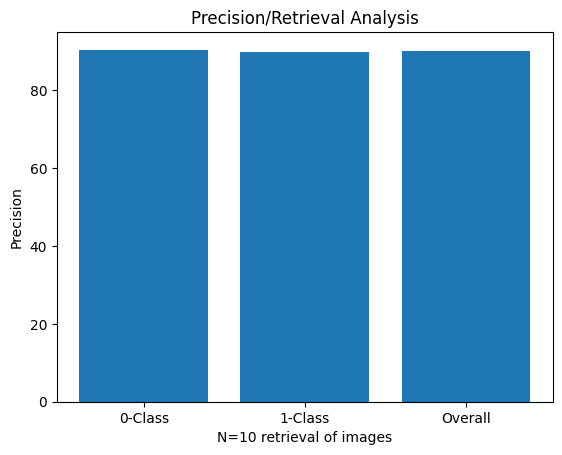

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['0-Class', '1-Class', 'Overall']
values = [90.39 ,89.71, 90.05]

# Creating the bar chart
plt.bar(categories, values)

# Adding labels and title
plt.ylabel('Precision')
plt.xlabel('N=10 retrieval of images')
plt.title('Precision/Retrieval Analysis')

# Display the chart
plt.show()


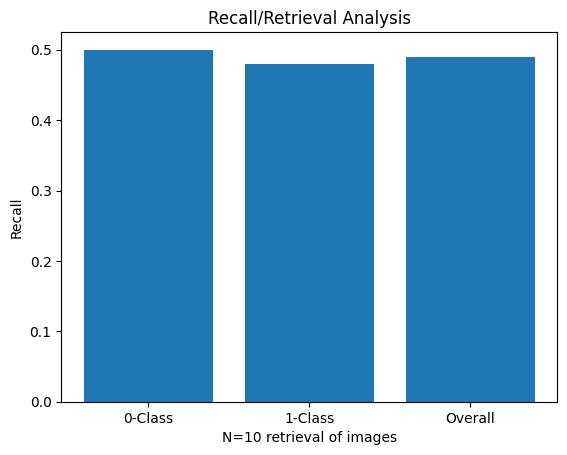

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['0-Class', '1-Class', 'Overall']
values = [0.50 ,0.48, 0.49]

# Creating the bar chart
plt.bar(categories, values)

# Adding labels and title
plt.ylabel('Recall')
plt.xlabel('N=10 retrieval of images')
plt.title('Recall/Retrieval Analysis')

# Display the chart
plt.show()


In [ ]:
def retrieve_similar_images(query_image, image_database, count):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:count]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices


In [ ]:
# Your existing code...

# Define a list of retrieval image counts to loop through
retrieval_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Loop through different retrieval counts
for count in retrieval_counts:
    precision_list = []
    recall_list = []

    for i in range(3662):  # Loop through all query images
        query_image = df.iloc[i]
        image_database = df  # Your main dataset containing images

        # Retrieving similar images
        similar_images_indices = retrieve_similar_images(query_image, image_database, count)

        # Extracting classes of query image and retrieved images
        query_class = query_image['diagnosis']
        retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
        relevant_images = np.count_nonzero(retrieved_classes == query_class)
        precision = relevant_images / count  # Use the current retrieval count
        recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

        precision_list.append(precision)
        recall_list.append(recall)

    # Computing average precision and recall for the current retrieval count
    average_precision = np.mean(precision_list)
    average_recall = np.mean(recall_list)

    print(f"Retrieval Count: {count}")
    print("Average Precision:", average_precision)
    print("Average Recall:", average_recall)
    print("\n")


Retrieval Count: 10
Average Precision: 0.9005188421627527
Average Recall: 0.0049184415690998245


Retrieval Count: 20
Average Precision: 0.8919442927362098
Average Recall: 0.009743331598311823


Retrieval Count: 30
Average Precision: 0.8876115055525214
Average Recall: 0.014544225576236506


Retrieval Count: 40
Average Precision: 0.8835540688148552
Average Recall: 0.019303695729261505


Retrieval Count: 50
Average Precision: 0.8795193883123976
Average Recall: 0.02401950361429494


Retrieval Count: 60
Average Precision: 0.8767613326051338
Average Recall: 0.028733448872875836


Retrieval Count: 70
Average Precision: 0.8749278302254818
Average Recall: 0.03345258330137731


Retrieval Count: 80
Average Precision: 0.8733786182413982
Average Recall: 0.038164120661282136


Retrieval Count: 90
Average Precision: 0.8715911159657745
Average Recall: 0.04284684372847657


Retrieval Count: 100
Average Precision: 0.8697924631348989
Average Recall: 0.047509663992901144




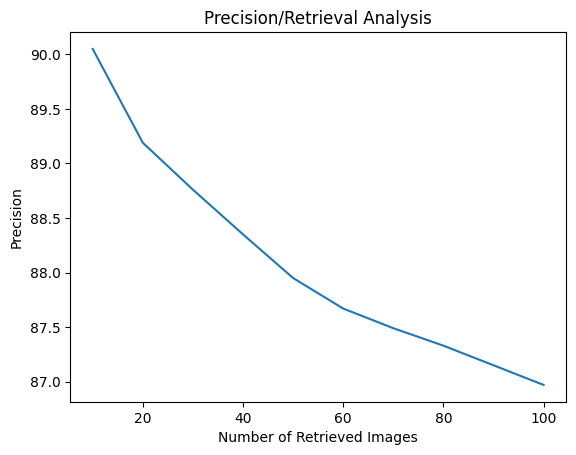

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # X-axis values
y_values = [90.05,89.19,88.76,88.35,87.95,87.67,87.49,87.33,87.15,86.97]  # Y-axis values

# Plotting the line graph
plt.plot(x_values, y_values)

# Adding labels and title
plt.ylabel('Precision')
plt.xlabel('Number of Retrieved Images')
plt.title('Precision/Retrieval Analysis')

# Display the plot
plt.show()


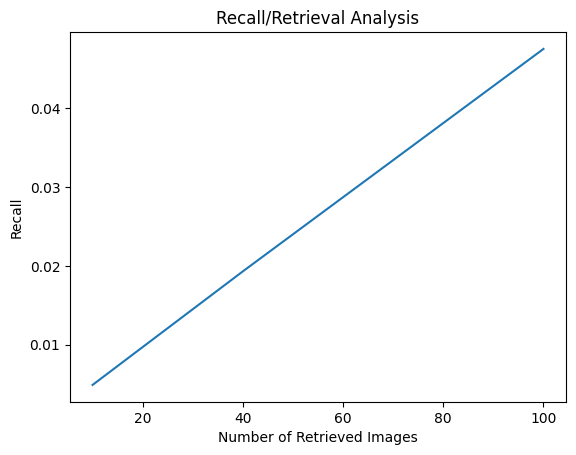

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # X-axis values
y_values = [0.0049, 0.0097, 0.0145, 0.0193, 0.0240, 0.0287, 0.0334,0.0381, 0.0428, 0.0475]  # Y-axis values

# Plotting the line graph
plt.plot(x_values, y_values)

# Adding labels and title
plt.ylabel('Recall')
plt.xlabel('Number of Retrieved Images')
plt.title('Recall/Retrieval Analysis')

# Display the plot
plt.show()
